In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp

In [39]:
#1. Loading data in to DataFrames
url = 'https://raw.githubusercontent.com/IshaanChawla0001/python-project/main/AAPL%20.csv'
df = pd.read_csv (url)
#2. Check the Data Types of your data columns
# convert the 'Date' column to datetime format
df['Date']= pd.to_datetime(df['Date'])
print('########################################################')
# Check the format of 'Date' column
df.info()


########################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10016 entries, 0 to 10015
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10016 non-null  datetime64[ns]
 1   Open       10015 non-null  float64       
 2   High       10015 non-null  float64       
 3   Low        10015 non-null  float64       
 4   Close      10015 non-null  float64       
 5   Adj Close  10015 non-null  float64       
 6   Volume     10015 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 547.9 KB


In [40]:
#3. Dropping unwanted column i.e 'Adj Close'and 'Volume'
df =df.drop(columns=['Adj Close','Volume'])
print(df)
print('####################################################################')
#4. Dropping null values i.e. in APPL.CSV on row 167 has null values once the down code is implementted null values are removed
df = df.dropna(how='any',axis=0)
print(df)

            Date        Open        High         Low       Close
0     1980-12-12    0.128348    0.128906    0.128348    0.128348
1     1980-12-15    0.122210    0.122210    0.121652    0.121652
2     1980-12-16    0.113281    0.113281    0.112723    0.112723
3     1980-12-17    0.115513    0.116071    0.115513    0.115513
4     1980-12-18    0.118862    0.119420    0.118862    0.118862
...          ...         ...         ...         ...         ...
10011 2020-08-26  126.180000  126.992500  125.082497  126.522499
10012 2020-08-27  127.142502  127.485001  123.832497  125.010002
10013 2020-08-28  126.012497  126.442497  124.577499  124.807503
10014 2020-08-31  127.580002  131.000000  126.000000  129.039993
10015 2020-09-01  132.759995  134.800003  130.529999  134.179993

[10016 rows x 5 columns]
####################################################################
            Date        Open        High         Low       Close
0     1980-12-12    0.128348    0.128906    0.128348    0.12

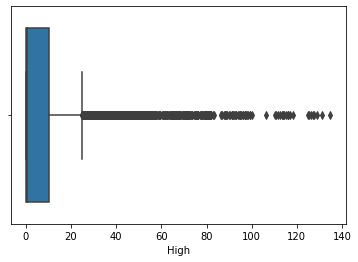

In [4]:
#5. Check for outliers using a box plot or histogram.
# checking maximum how much price varied
sns.boxplot(x=df['High'])

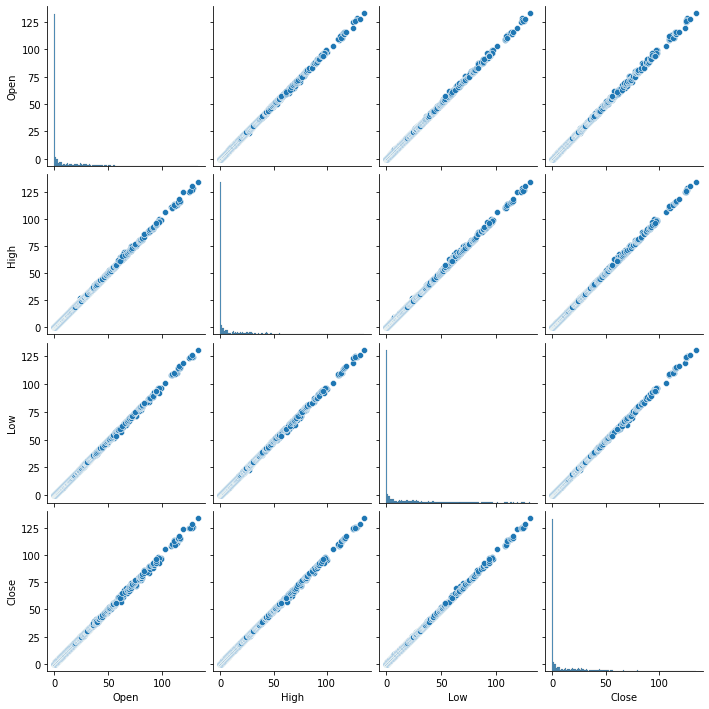

In [5]:
#6. Plot features against each other using a pair plot.
sns.pairplot(df)

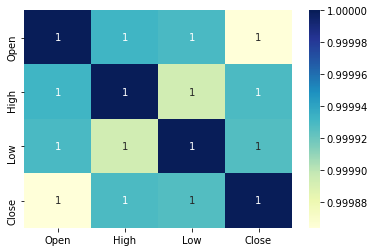

In [6]:
#7. Use a HeatMap for finding the correlation between the features(Feature to Feature)
sns.heatmap(df.corr(), annot = True,cmap="YlGnBu")


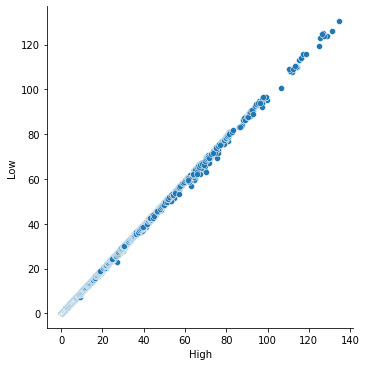

In [7]:
#8. Use a scatter plot to show the relationship between 2 variables.
sns.relplot(x="High", y="Low", data=df)

In [8]:
#9. merging dataframes
#Creating new column i.e 'DPV' (Daily Price Variation) which will be the difference of higest and lowest share price
df['DPV'] = df['High'] - df['Low'] 
print(df)

            Date        Open        High         Low       Close       DPV
0     1980-12-12    0.128348    0.128906    0.128348    0.128348  0.000558
1     1980-12-15    0.122210    0.122210    0.121652    0.121652  0.000558
2     1980-12-16    0.113281    0.113281    0.112723    0.112723  0.000558
3     1980-12-17    0.115513    0.116071    0.115513    0.115513  0.000558
4     1980-12-18    0.118862    0.119420    0.118862    0.118862  0.000558
...          ...         ...         ...         ...         ...       ...
10011 2020-08-26  126.180000  126.992500  125.082497  126.522499  1.910003
10012 2020-08-27  127.142502  127.485001  123.832497  125.010002  3.652504
10013 2020-08-28  126.012497  126.442497  124.577499  124.807503  1.864998
10014 2020-08-31  127.580002  131.000000  126.000000  129.039993  5.000000
10015 2020-09-01  132.759995  134.800003  130.529999  134.179993  4.270004

[10015 rows x 6 columns]


In [29]:
#10. slicing data of a particular column i.e 'Date' , DPV
print(df['Date'])
print('########################################################')
print(df['DPV'])
print('########################################################')
df.iloc[1:295]

0       1980-12-12
1       1980-12-15
2       1980-12-16
3       1980-12-17
4       1980-12-18
           ...    
10011   2020-08-26
10012   2020-08-27
10013   2020-08-28
10014   2020-08-31
10015   2020-09-01
Name: Date, Length: 10015, dtype: datetime64[ns]
########################################################
0        0.000558
1        0.000558
2        0.000558
3        0.000558
4        0.000558
           ...   
10011    1.910003
10012    3.652504
10013    1.864998
10014    5.000000
10015    4.270004
Name: DPV, Length: 10015, dtype: float64
########################################################


,Date,Open,High,Low,Close,DPV
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.000558
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.000558
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.000558
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.000558
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.000558
...,...,...,...,...,...,...
291,1982-02-08,0.083147,0.083147,0.082589,0.082589,0.000558
292,1982-02-09,0.082589,0.083147,0.082589,0.082589,0.000558
293,1982-02-10,0.083705,0.084263,0.083705,0.083705,0.000558
294,1982-02-11,0.083147,0.083147,0.082589,0.082589,0.000558


In [41]:
#12. Uploading data to Numerical Python
numpydata = df.rename_axis('ID').values
print('########################################################')
#11. Representing data in matrix form
print(numpydata)

########################################################
[[Timestamp('1980-12-12 00:00:00') 0.128348 0.128906 0.128348 0.128348]
 [Timestamp('1980-12-15 00:00:00') 0.12220999999999999
  0.12220999999999999 0.121652 0.121652]
 [Timestamp('1980-12-16 00:00:00') 0.11328099999999999
  0.11328099999999999 0.112723 0.112723]
 ...
 [Timestamp('2020-08-28 00:00:00') 126.012497 126.442497 124.577499
  124.807503]
 [Timestamp('2020-08-31 00:00:00') 127.58000200000001 131.0 126.0
  129.03999299999998]
 [Timestamp('2020-09-01 00:00:00') 132.759995 134.800003 130.529999
  134.179993]]


In [14]:
#13. Select a slice or part of the data and display
sliced_data = numpydata[:5,:3]
print(sliced_data)

[[Timestamp('1980-12-12 00:00:00') 0.128348 0.128906]
 [Timestamp('1980-12-15 00:00:00') 0.12220999999999999
  0.12220999999999999]
 [Timestamp('1980-12-16 00:00:00') 0.11328099999999999
  0.11328099999999999]
 [Timestamp('1980-12-17 00:00:00') 0.115513 0.11607100000000001]
 [Timestamp('1980-12-18 00:00:00') 0.118862 0.11942]]


In [15]:
#14.  Use conditions and segregate the data based on the condition (like show data of a feature(column)>,<,= a number)
#Filtering value of Opening share price only for January 2020
start_date = "2020-1-1"
end_date = "2020-1-31"

after_start_date = df["Date"] >= start_date
before_end_date = df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = df.loc[between_two_dates]

print(filtered_dates)

           Date       Open       High        Low      Close       DPV
9847 2020-01-02  74.059998  75.150002  73.797501  75.087502  1.352501
9848 2020-01-03  74.287498  75.144997  74.125000  74.357498  1.019997
9849 2020-01-06  73.447502  74.989998  73.187500  74.949997  1.802498
9850 2020-01-07  74.959999  75.224998  74.370003  74.597504  0.854995
9851 2020-01-08  74.290001  76.110001  74.290001  75.797501  1.820000
9852 2020-01-09  76.809998  77.607498  76.550003  77.407501  1.057495
9853 2020-01-10  77.650002  78.167503  77.062500  77.582497  1.105003
9854 2020-01-13  77.910004  79.267502  77.787498  79.239998  1.480004
9855 2020-01-14  79.175003  79.392502  78.042503  78.169998  1.349999
9856 2020-01-15  77.962502  78.875000  77.387497  77.834999  1.487503
9857 2020-01-16  78.397499  78.925003  78.022499  78.809998  0.902504
9858 2020-01-17  79.067497  79.684998  78.750000  79.682503  0.934998
9859 2020-01-21  79.297501  79.754997  79.000000  79.142502  0.754997
9860 2020-01-22  79.

In [20]:
#15. Use mathematical and statistical functions using libraries
#Average opening share price of APPLE in January 2020
average_open_price_in_january2020 = np.mean(df['High'])
print(average_open_price_in_january2020)

average_daily_change = np.mean(df['DPV'])
print(average_daily_change)


9.107720031253123
0.18672657733399892


In [17]:
#16. Select data based on a category(categorical data based)
#df['Date']
df['Open']
#df['High']
#df['Low']
#df['Close']
#df['DPV']


0          0.128348
1          0.122210
2          0.113281
3          0.115513
4          0.118862
            ...    
10011    126.180000
10012    127.142502
10013    126.012497
10014    127.580002
10015    132.759995
Name: Open, Length: 10015, dtype: float64